## In-Class Demo:  Non-Linear Transforms  (Class from 9/23/2021)

In this demo, I showed how to structure code to use a linear transformation.  Going through this demo, you will learn to:

* Define a `transform` function 
* Use the transform function on the training and test
* Use the transform funciton on new points

We first import the standard packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

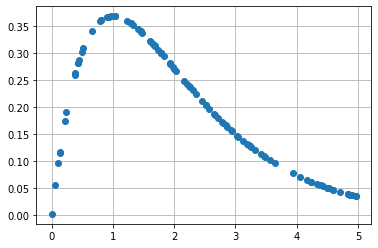

In [4]:
# Create some synthetic data
nsamp = 100
x = np.random.uniform(0,5,nsamp)
y = x*np.exp(-x)
plt.plot(x,y,'o')
plt.grid()

In general, a transformed model is of the form:
```
    yhat = \sum_{j=1}^p beta[j]*\phi_j(x)
```
where `phi_j(x)` is the `j`-th basis function.  We can write this as
```
    yhat = beta[j]*z[j],   z[j] = \phi_j(x).
```
To fit such a model in python, we write a function `transform` that maps the data matrix `X` to a tranformed features `Z`:
```
    Z[i,j] = \phi_j(X[i])
```
which is the transform feature for the `i`-th sample.

As an example, suppose we want to use polynomial model:
```
  Z[i,j] = x[i]**j,   j = 0,...,d.
```
The tranform function is then given as follows:

In [6]:
def transform(x, d):
  """
  Creates the transform data matrix. 
  In this case, we create a matrix Z[:,i] = x**i
  i = 0,...,d
  for polynomial fitting
  """
  n = len(x)
  Z = np.zeros((n,d+1))

  # Slow way:
  for i in range(d+1):
    Z[:,i] = x**i

  return Z


In [10]:
# Split data into train and test
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(x,y, test_size=0.5, shuffle=True)

# Transform the train and test
d = 4
Ztr = transform(Xtr,d)
Zts = transform(Xts,d)

(50, 5)

In [11]:
# Fit a linear model from the transform features Ztr to ytr
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Ztr,ytr)  

# Find the MSE on the transformed data
yhat = reg.predict(Zts)
mse = np.mean((yhat-yts)**2)
print('Test MSE = %12.4e' % mse)

Test MSE =   2.0375e-04


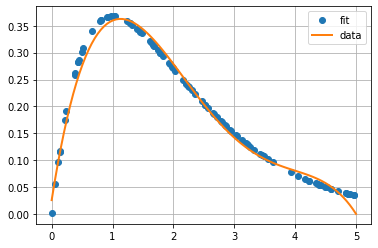

In [14]:
# We can also predict the values xp from [0,5]:
xp = np.linspace(0,5,100)
Zp = transform(xp,d)
yhatp = reg.predict(Zp)

plt.plot(x,y,'o')
plt.plot(xp,yhatp,lw=2)
plt.grid()
plt.legend(['fit', 'data'])

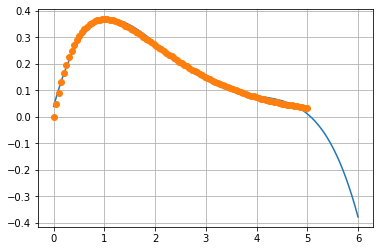

In [ ]:
# Predict on some new points
xts = np.linspace(0,6,100)
Zts = transform(xts,d)
yhat_ts = reg.predict(Zts)

plt.plot(xts, yhat_ts)
plt.plot(x,y,'o')
plt.grid()